<!--NAVIGATION-->
< [Data Subset: Depth Profile](DepthProfile.ipynb) | [Index](Index.ipynb) | [Match (colocalize) Datasets](Match.ipynb)>

<a href="https://colab.research.google.com/github/simonscmap/pycmap/blob/master/docs/Climatology.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

<a href="https://mybinder.org/v2/gh/simonscmap/pycmap/master?filepath=docs%2FClimatology.ipynb"><img align="right" src="https://mybinder.org/badge_logo.svg" alt="Open in Colab" title="Open and Execute in Binder"></a>

## *climatology(table, variable, period, periodVal, lat1, lat2, lon1, lon2, depth1, depth2)*

Computes the climatology of a gridded dataset over a spatial domain delimited by (lat1, lat2, lon1, lon2, depth1, depth2). Note this method does not apply to sparse datasets. The parameter `period` specifies the climatology interval (e.g weekly, monthly...) and `periodVal` sets the interval value. For example, to compute the climatology of a variable for the month of October, `period` is set to 'month' and `periodVal` is set to 10. Please avoid using periods that are finner than the temporal resolution of the underlying dataset. For instance, if the dataset is a weekly-averaged product, do not set the `period` to 'dayofyear'.

<br />The output of this method is a Pandas DataFrame ordered by time, lat, lon, and depth (if exists), respectively.

> **Parameters:** 
>> **table: string**
>>  <br />Table name (each dataset is stored in a table). A full list of table names can be found in [catalog](Catalog.ipynb). 
>> <br />
>> <br />**variable: string**
>>  <br />Variable short name which directly corresponds to a field name in the table. A subset of this variable's climatology is returned by this method according to the spatio cut parameters (below). A full list of variable short names can be found in [catalog](Catalog.ipynb).
>> <br />
>> <br />**period: string**
>>  <br />Specifies the aggregation period and can be either one of the following values:<br />
**'d'** or **'dayofyear'** for day-of-year climatology<br />
**'w'** or **'week'** or **'weekly'** for weekly climatology<br />
**'m'** or **'month'** or **'monthly'** for monthly climatology<br />
**'a'** or **'y'** or **'yearly'** for interannual averaging
>> <br />
>> <br />**periodVal: string**
>>  <br />Sets the value of the climatology interval. For instance, to retrieve the chlorophyll climatology for the month of March `period` is set to 'month' and `periodVal` is set to 3 (see example below). 
>> <br />
>> <br />**lat1: float**
>>  <br />Start latitude [degree N]. This parameter sets the lower bound of the meridional cut. Note latitude ranges from -90&deg; to 90&deg;.
>> <br />
>> <br />**lat2: float**
>>  <br />End latitude [degree N]. This parameter sets the upper bound of the meridional cut. Note latitude ranges from -90&deg; to 90&deg;.
>> <br />
>> <br />**lon1: float**
>>  <br />Start longitude [degree E]. This parameter sets the lower bound of the zonal cut. Note longitue ranges from -180&deg; to 180&deg;.
>> <br />
>> <br />**lon2: float**
>>  <br />End longitude [degree E]. This parameter sets the upper bound of the zonal cut. Note longitue ranges from -180&deg; to 180&deg;.
>> <br />
>> <br />**depth1: float**
>>  <br />Start depth [m]. This parameter sets the lower bound of the vertical cut. Note depth is a positive number (it is 0 at surface and grows towards ocean floor).
>> <br />
>> <br />**depth2: float**
>>  <br />End depth [m]. This parameter sets the upper bound of the vertical cut. Note depth is a positive number (it is 0 at surface and grows towards ocean floor).


>**Returns:** 
>>  Pandas dataframe.


### Example 1

This example computes and retrieves a subset of [sea surface salinity](https://cmap.readthedocs.io/en/latest/catalog/datasets/SSS.html#sss) weekly climatology for the week of 46. 

In [ ]:
#!pip install pycmap -q     #uncomment to install pycmap, if necessary

import pycmap

api = pycmap.API(token='<YOUR_API_KEY>')
api.climatology(
                table='tblSSS_NRT', 
                variable='sss', 
                period='week', 
                periodVal=46, 
                lat1=20, 
                lat2=50, 
                lon1=-170, 
                lon2=-120, 
                depth1=0, 
                depth2=0
                ) 


### Example 2

This example computes and retrieves a subset of [chlorophyll](https://cmap.readthedocs.io/en/latest/catalog/datasets/Chlorophyll_REP.html#chlorophyll-rep) climatology for the month of March.
<br />Notice, depth1 and depth2 values are automatically ignored because this is a surface dataset. 
<br />A simple plot is made to visualize the retrieved data.

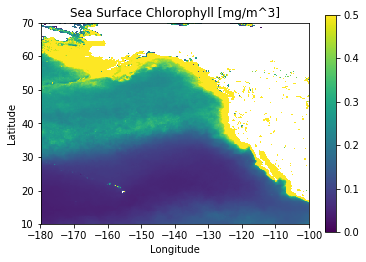

In [2]:
#!pip install pycmap -q     #uncomment to install pycmap, if necessary

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pycmap



def plot(df):
    lat = df.lat.unique()
    lon = df.lon.unique()
    shape = (len(lat), len(lon))
    data = df.chl.values.reshape(shape)
    plt.imshow(data, extent=[np.min(lon), np.max(lon), np.min(lat), np.max(lat)], cmap='viridis', origin='bottom', vmin=0, vmax=0.5)
    plt.title('Sea Surface Chlorophyll [mg/m^3]')
    plt.colorbar()
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()
    

api = pycmap.API(token='<YOUR_API_KEY>')
df = api.climatology(
                     table='tblCHL_REP', 
                     variable='chl', 
                     period='month', 
                     periodVal=3, 
                     lat1=10, 
                     lat2=70, 
                     lon1=-180, 
                     lon2=-100, 
                     depth1=0, 
                     depth2=0
                     ) 
plot(df)

<img src="figures/sql.png" alt="SQL" align="left" width="40"/> 
<br/>
### SQL Statement
Here is how to achieve the same results using a direct SQL statement. Please refere to [Query](Query.ipynb) for more information.

<code>EXEC uspAggregate 'tableName', 'variable', 'period', 'periodVal', 'lat1', 'lat2', 'lon1', 'lon2', 'depth1', 'depth2'</code>


**Example:**<br/>
<code>EXEC uspAggregate 'tblCHL_REP', 'chl', 'month', '3', '10', '70', '-180', '100', '0', '0'</code>